# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Ivan Dimitra
- Email: ivandimitra@gmail.com
- Id Dicoding: a010ybm329

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Manipulasi Data
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pra-pemrosesan & Analisis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modeling (jika ingin membangun prediksi attrition)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Untuk interaktivitas (jika diperlukan)
import streamlit as st


### Menyiapkan data yang akan digunakan

In [2]:
# Path file di Drive
file_path = 'employee_data.csv'

# Load dataset
df = pd.read_csv(file_path, low_memory=False)  # low_memory=False supaya tidak warning data types

df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [3]:
df.shape    # Menampilkan dimensi dataset

(1470, 35)

Terdapat 1470 data dengan 35 fitur

In [4]:
print(df.columns.tolist())

['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [6]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Terdapat 27 fitur dengan data numerik

In [7]:
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Cuma attrition saja yang ada nilai kosong, terdapat 412 data yang seperti itu

In [8]:
df.duplicated().sum()

0

Tidak ada duplikasi data

In [9]:
# Menampilkan jumlah nilai unik untuk setiap kolom bertipe kategorikal
df.select_dtypes(include='object').nunique()


BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

Over18 tidak guna karena cuma ada 1 kategori

In [10]:
# Menampilkan distribusi nilai pada setiap kolom kategorikal
for col in df.select_dtypes(include='object').columns:
    print(f"\nDistribusi nilai pada kolom '{col}':")
    print(df[col].value_counts())



Distribusi nilai pada kolom 'BusinessTravel':
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Distribusi nilai pada kolom 'Department':
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Distribusi nilai pada kolom 'EducationField':
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Distribusi nilai pada kolom 'Gender':
Gender
Male      882
Female    588
Name: count, dtype: int64

Distribusi nilai pada kolom 'JobRole':
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources     

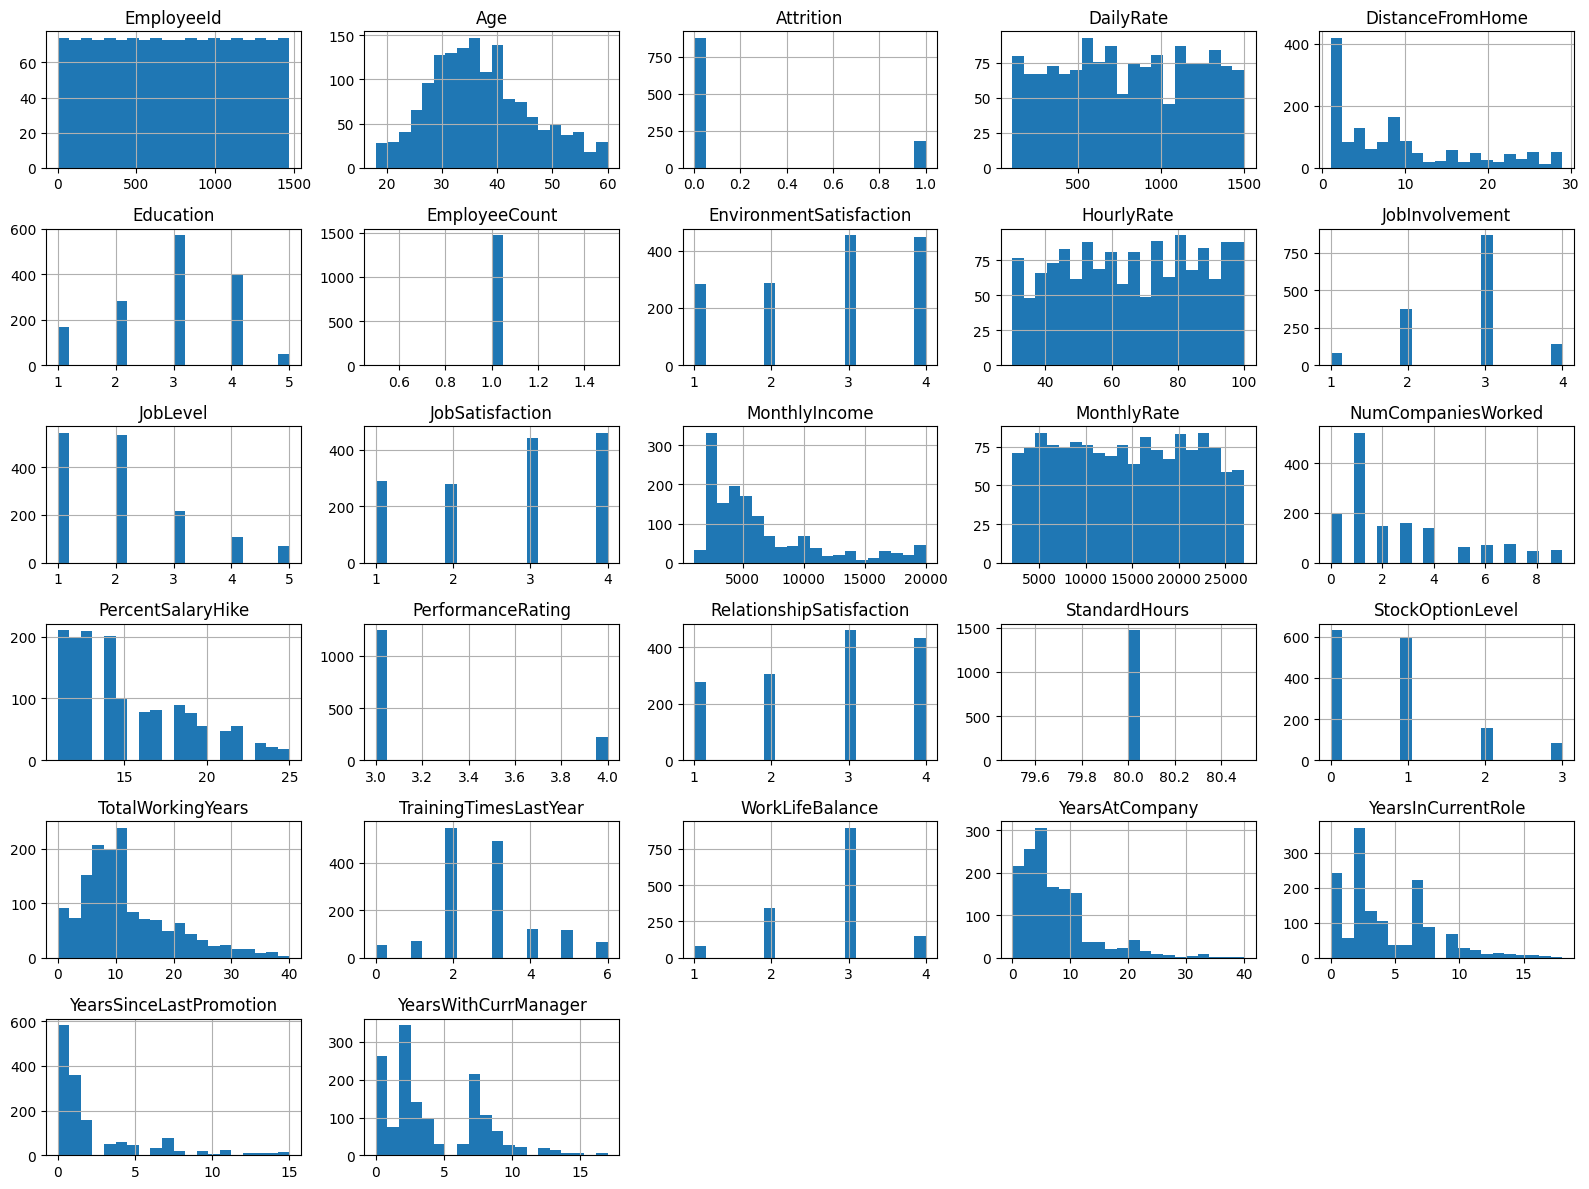

In [11]:


# Kolom numerik saja
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram untuk beberapa kolom numerik
df[numerical_cols].hist(bins=20, figsize=(16, 12))
plt.tight_layout()
plt.show()


Employee count dan standard house juga tidak guna karena cuma satu jenis value saja

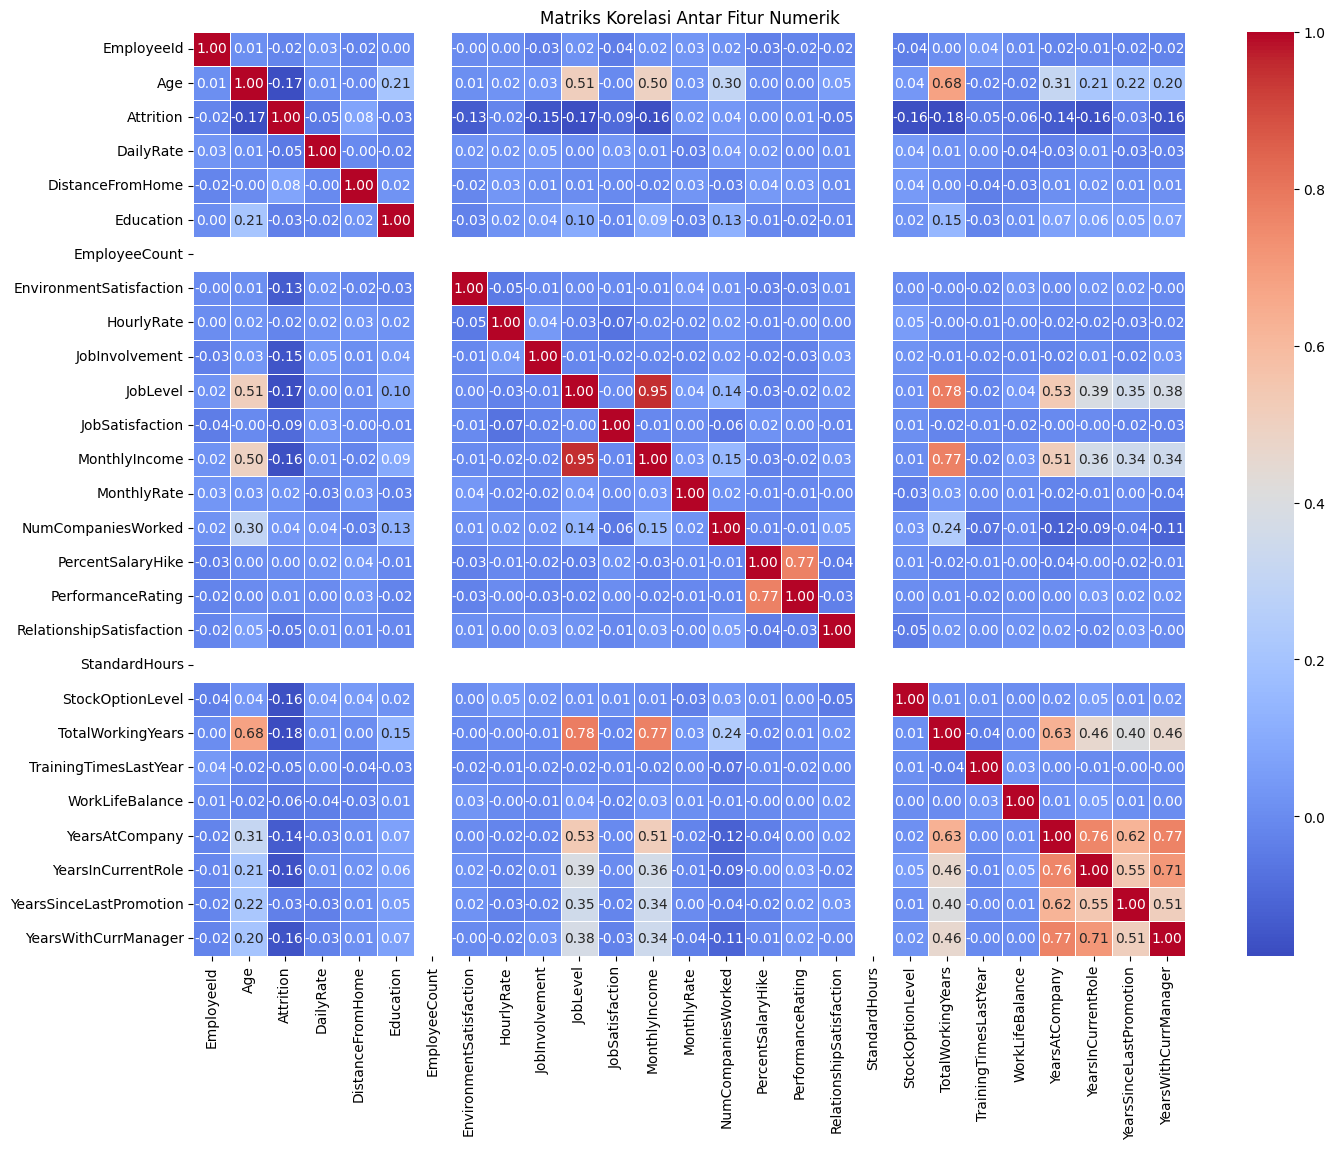

In [12]:
# Korelasi antar fitur numerik
plt.figure(figsize=(16, 12))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()


Cuma 5 fitur yang berkorelasi positif dengan attrition, itupun kecil sekali

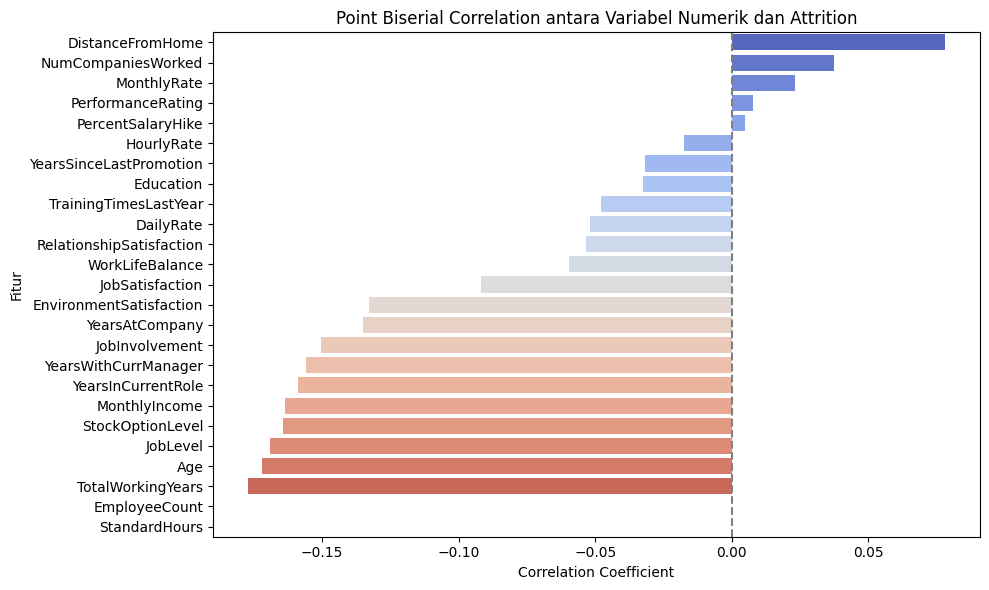

In [13]:

# Pastikan kolom numerik sudah dipilih (kecuali Attrition dan id)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['EmployeeId', 'Attrition'])

# Drop baris dengan nilai NaN di kolom 'Attrition'
df_clean = df.dropna(subset=['Attrition'])

# Hitung point biserial correlation
correlations = {}
for col in numeric_features:
    corr, _ = pointbiserialr(df_clean['Attrition'], df_clean[col])
    correlations[col] = corr

# Konversi ke DataFrame untuk visualisasi
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['PointBiserialCorr'])
corr_df = corr_df.sort_values(by='PointBiserialCorr', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_df.PointBiserialCorr, y=corr_df.index, palette='coolwarm')
plt.title('Point Biserial Correlation antara Variabel Numerik dan Attrition')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Fitur')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


Dengan PBC plot sama, juga cuma 5 fitur yang berkorelaasi positif

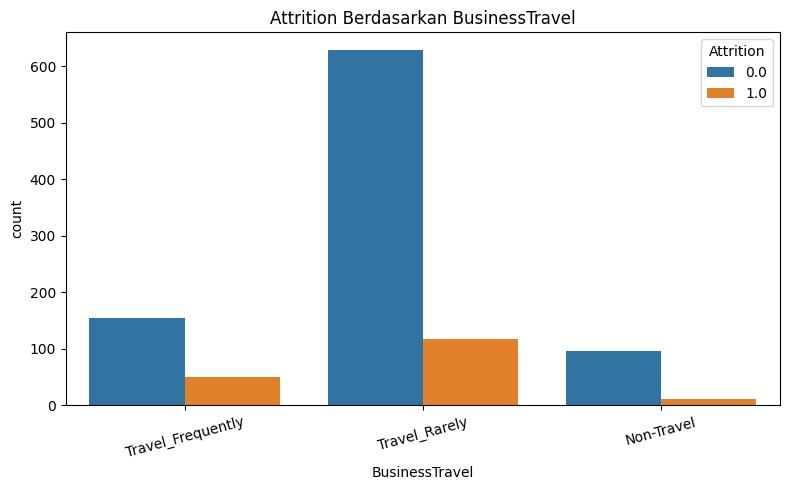

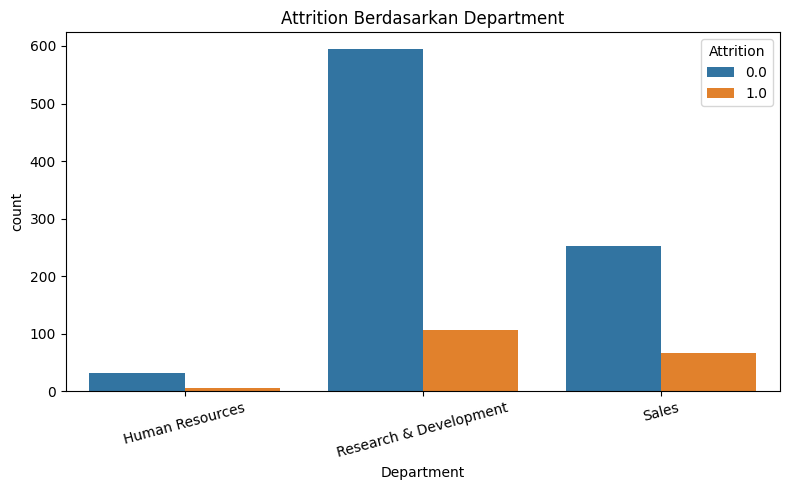

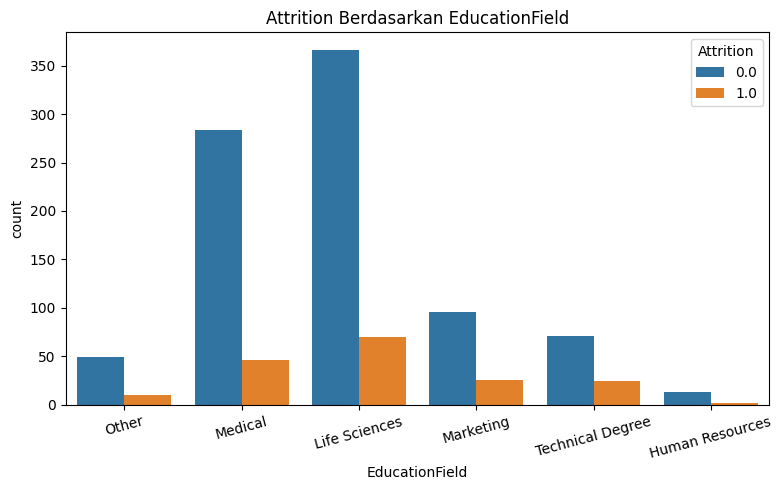

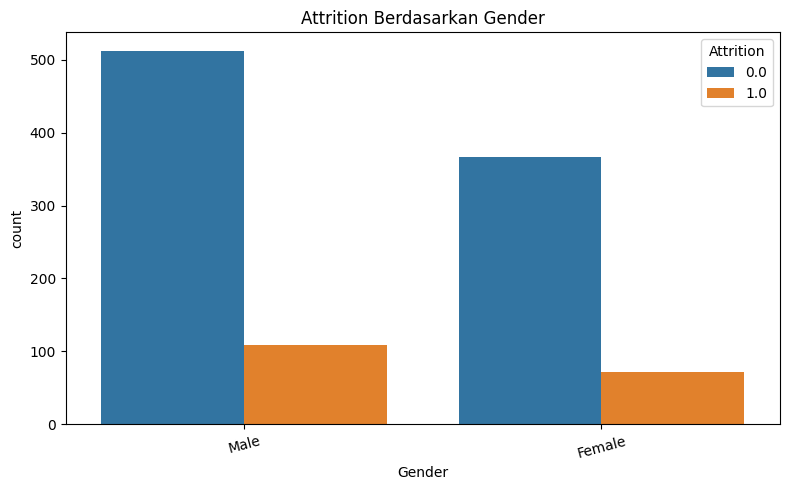

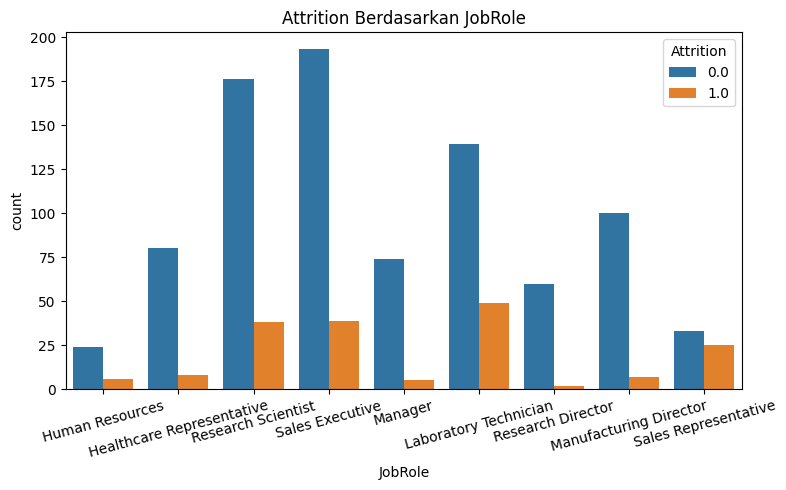

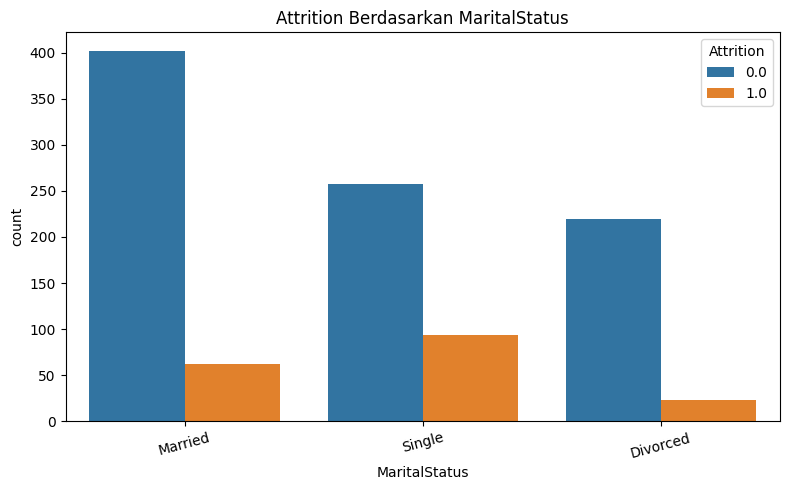

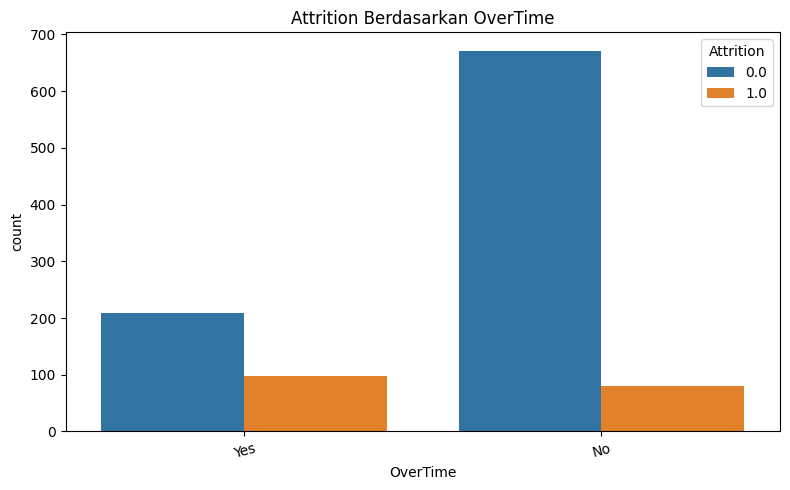

In [14]:
# Buat list kolom kategorikal
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']

# Plot countplot untuk tiap fitur kategorikal terhadap Attrition
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f'Attrition Berdasarkan {col}')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


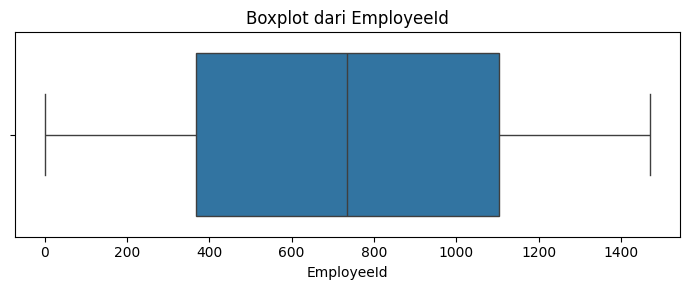

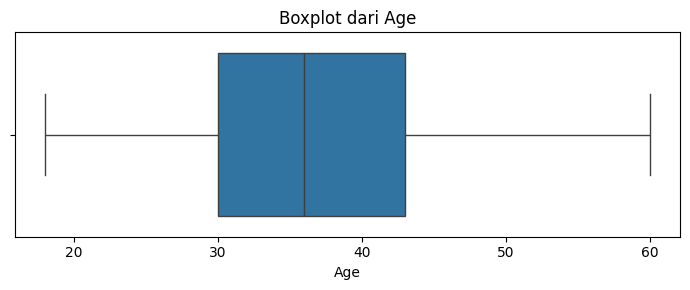

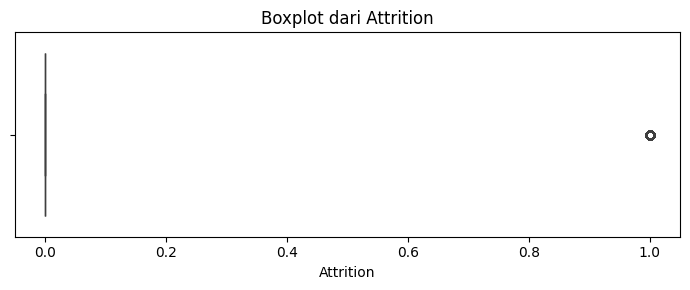

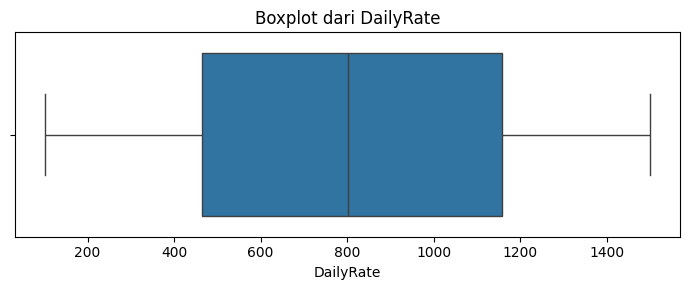

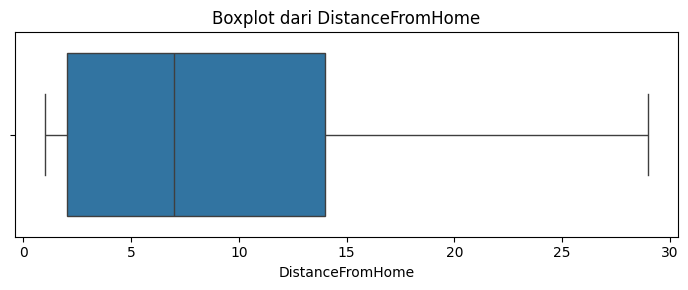

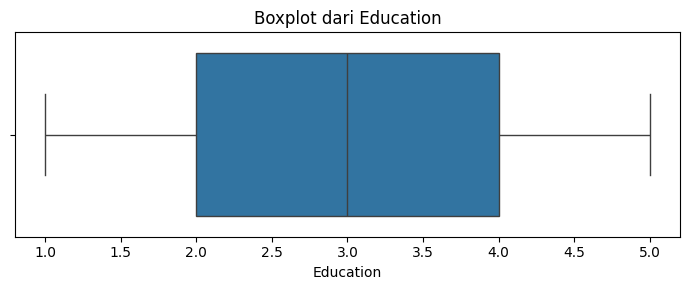

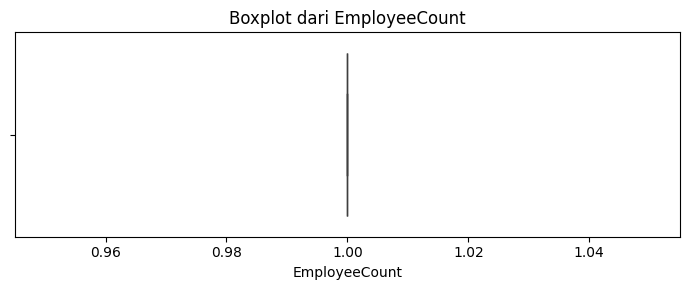

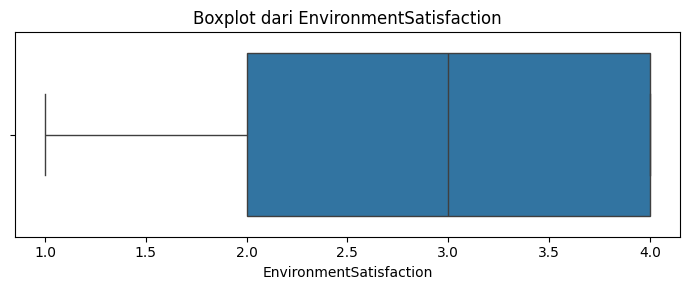

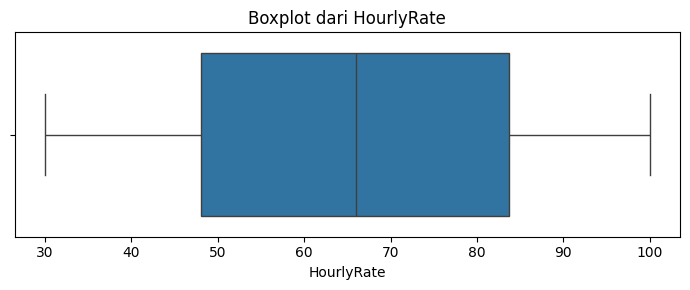

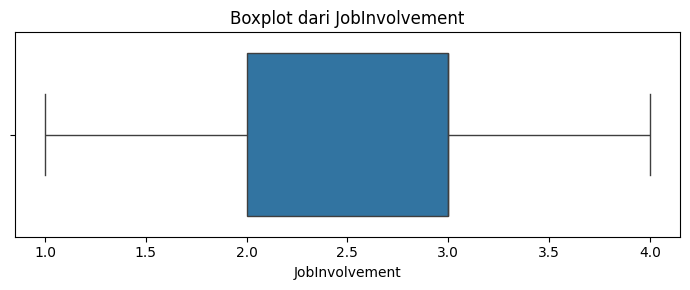

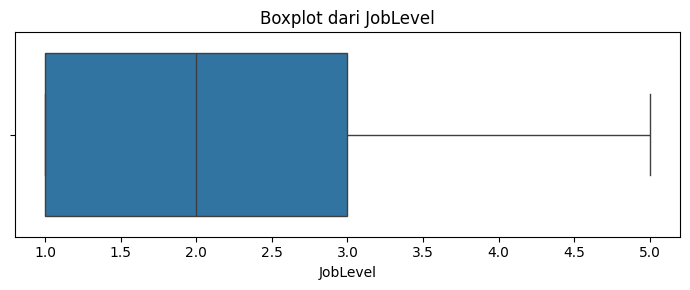

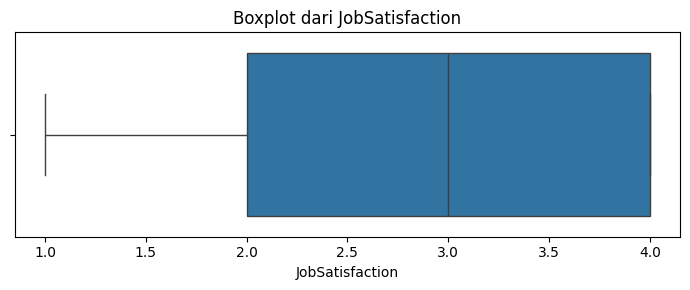

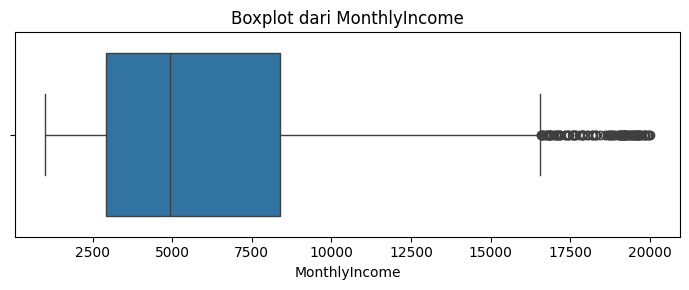

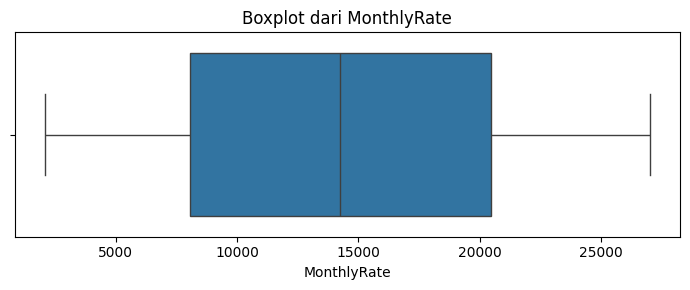

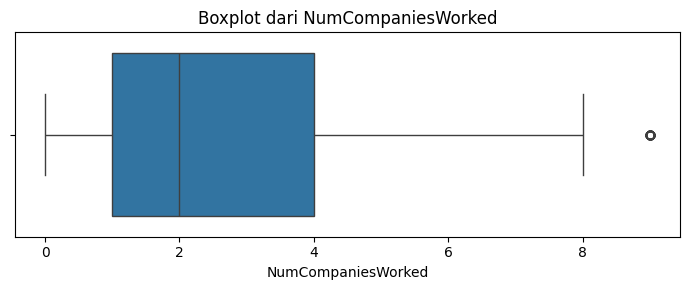

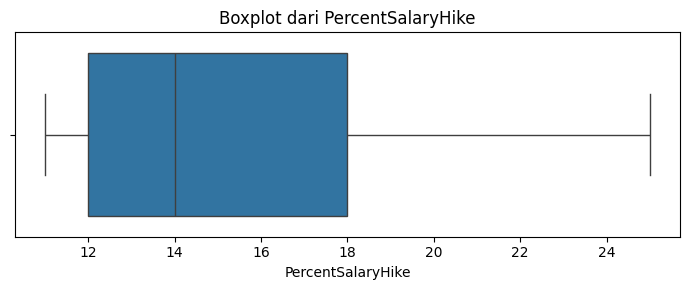

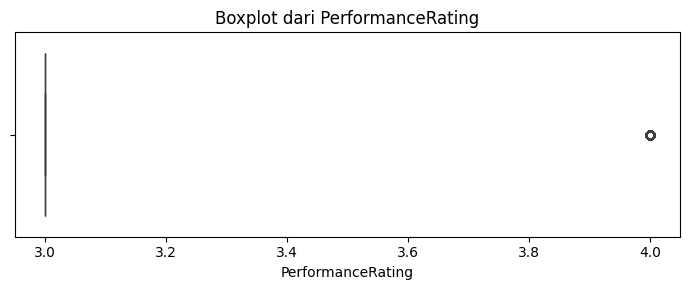

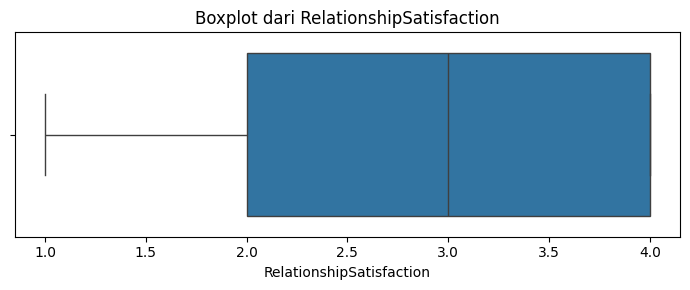

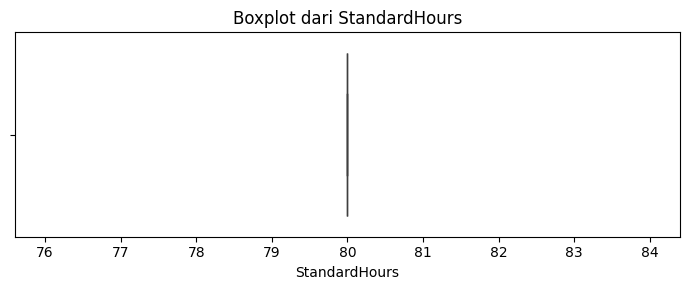

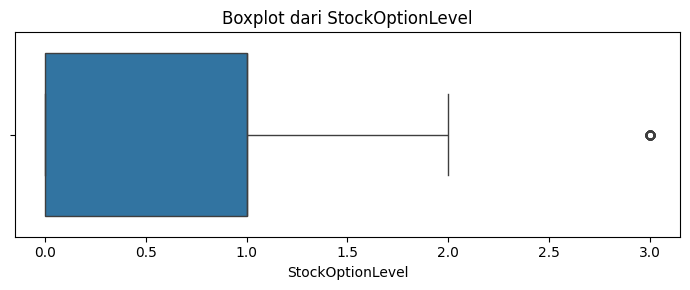

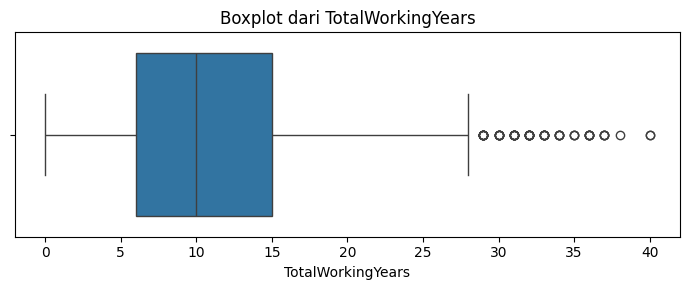

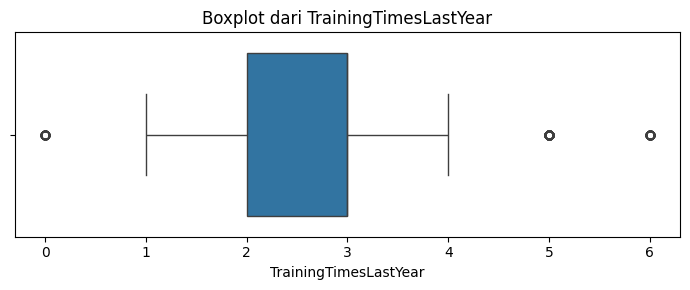

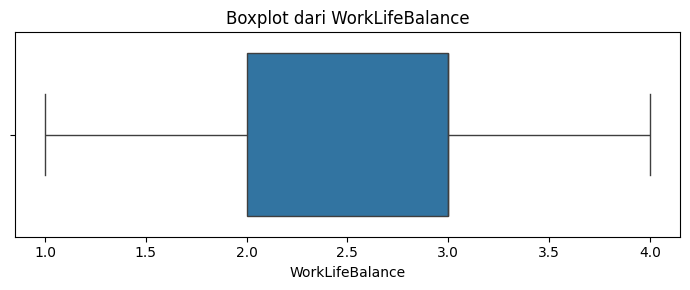

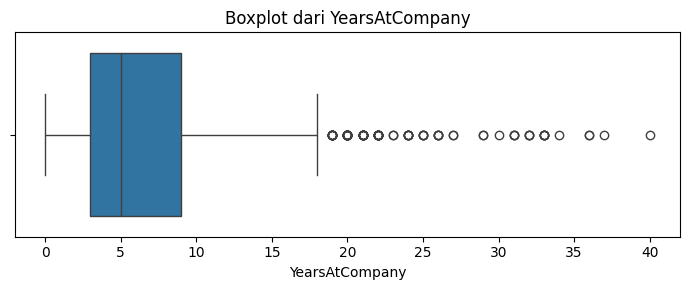

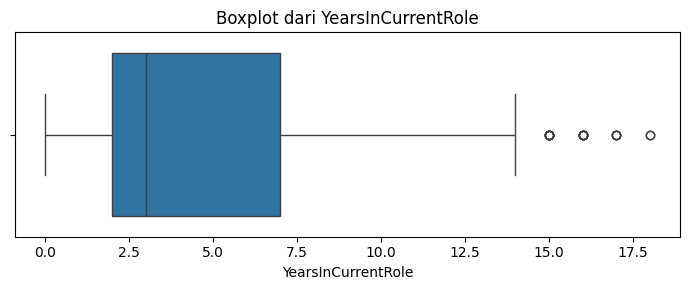

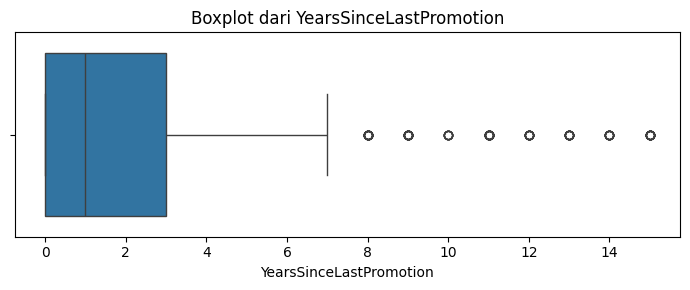

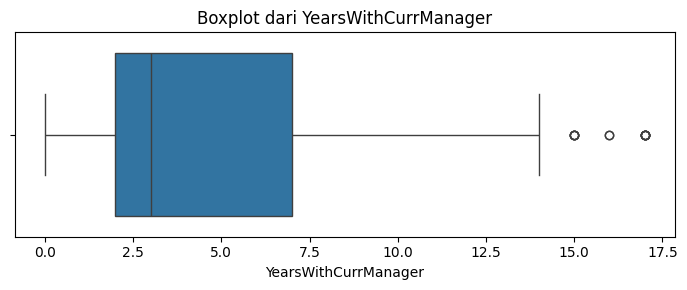

In [15]:
# Ambil semua kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualisasi boxplot semua kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot dari {col}')
    plt.tight_layout()
    plt.show()


Terdapat beberapa nilai outlier

## Data Preparation / Preprocessing

Kita bersihkan nilai kosong dulu

In [16]:
df_clean = df.dropna()

In [17]:
# Cek jumlah nilai NaN di setiap kolom
print("Jumlah nilai NaN di setiap kolom:")
print(df_clean.isna().sum())

# Cek jumlah baris duplikat
print("\nJumlah baris duplikat:")
print(df_clean.duplicated().sum())

Jumlah nilai NaN di setiap kolom:
EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsI

Kita akan capping untuk menangani outlier, tapi fitur yang sekiranya mirip kategorikal walau dia numerik tidak diikutkan dalam proses capping

In [18]:
# Penanganan Outlier dengan Capping
# Daftar fitur numerik yang tidak akan dicapping
excluded_features = [
    'Attrition', 'Education', 'EnvironmentSatisfaction', 'JobLevel',
    'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
    'WorkLifeBalance'
]

# Fitur numerik yang akan dicapping
capping_features = [col for col in numerical_cols if col not in excluded_features]

# Capping outlier pada fitur numerik
for col in capping_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[col] = np.clip(df_clean[col], lower_bound, upper_bound)


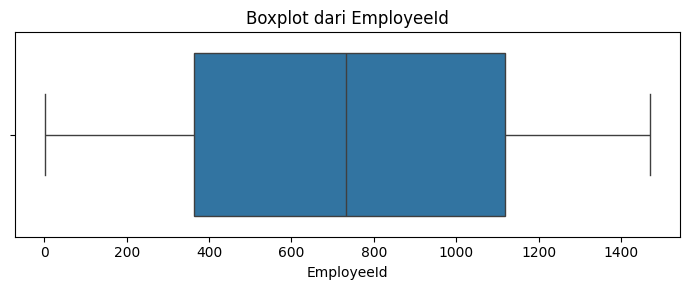

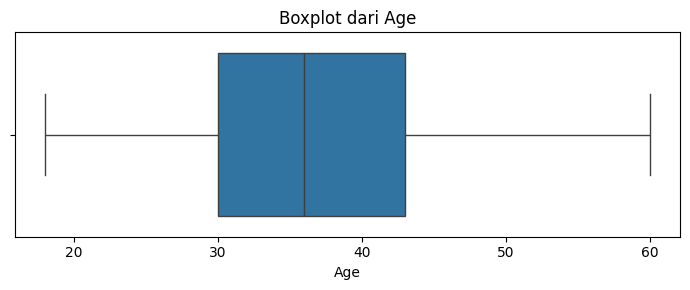

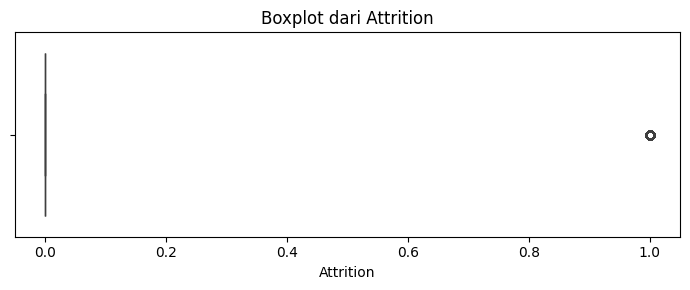

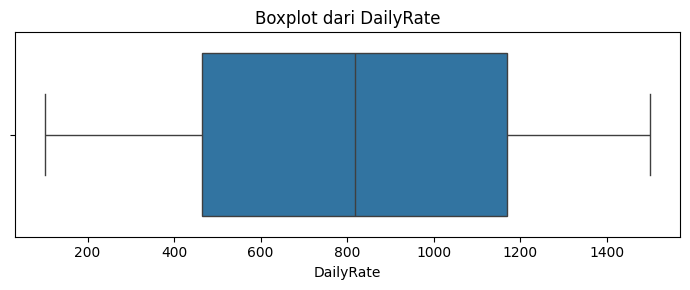

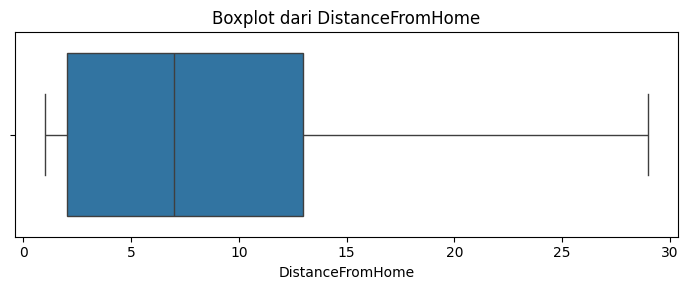

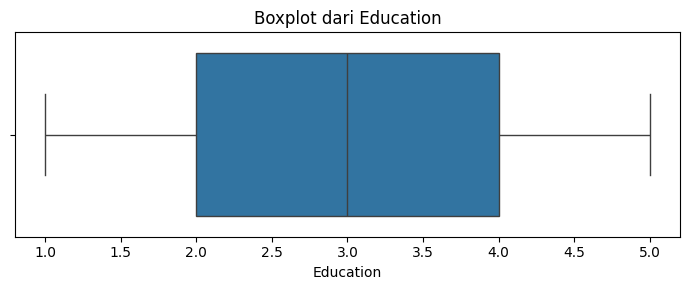

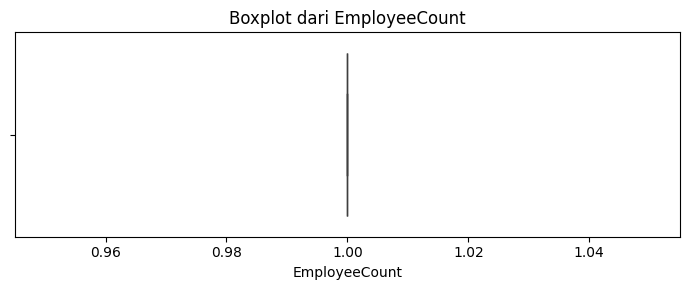

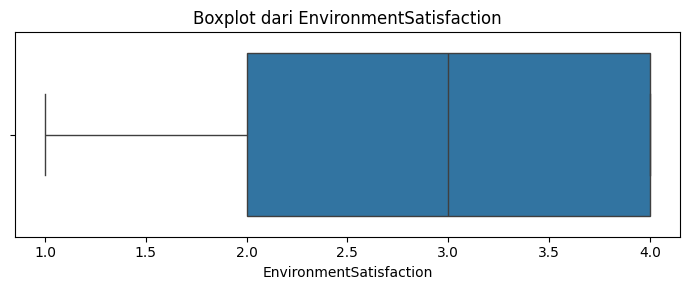

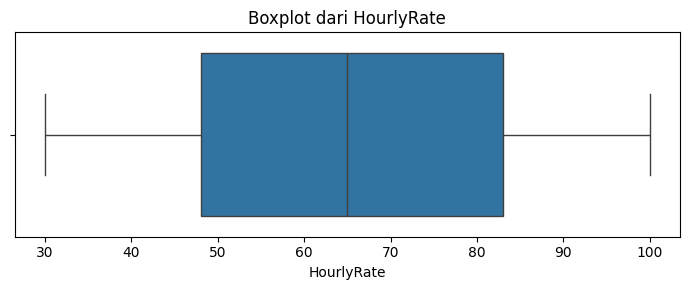

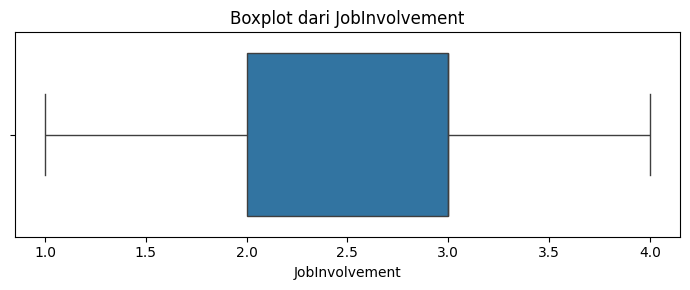

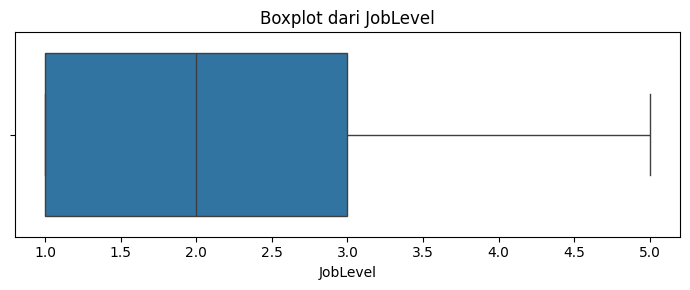

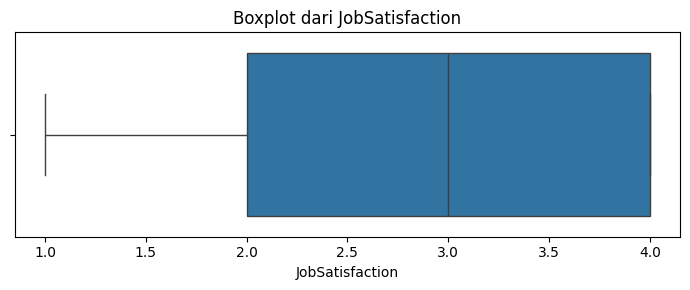

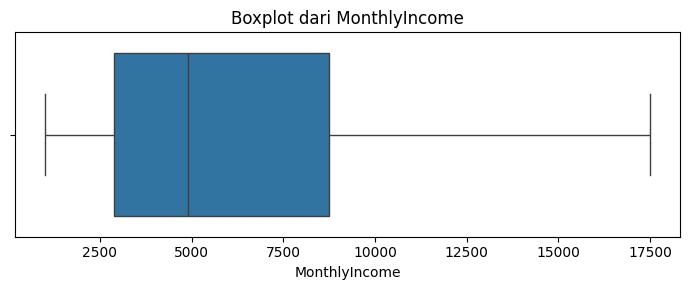

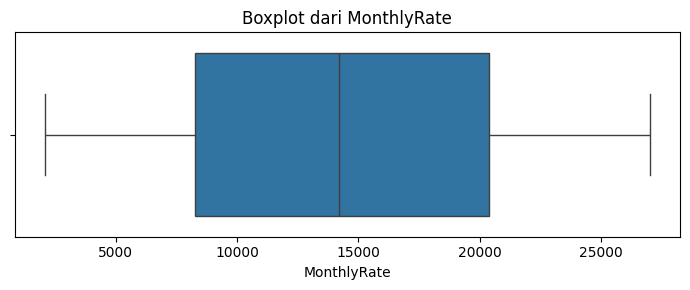

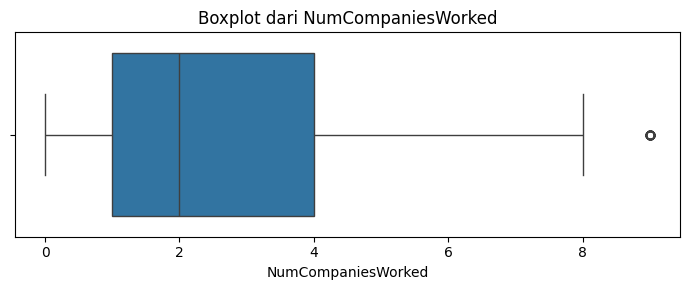

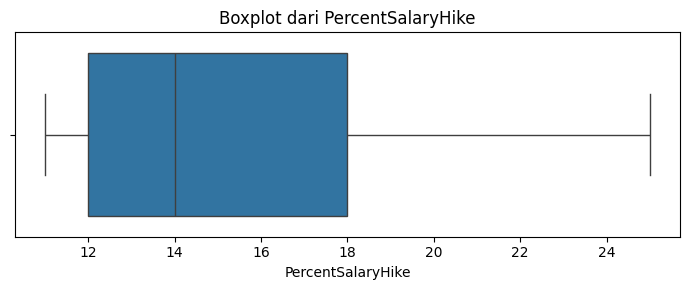

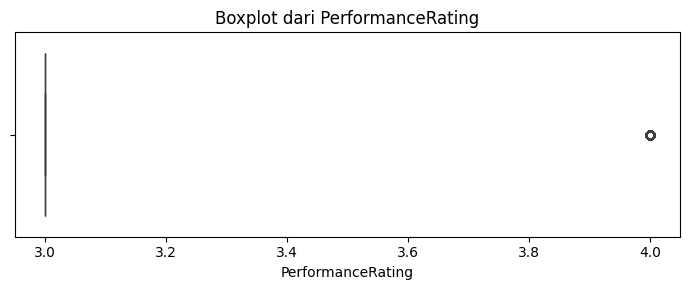

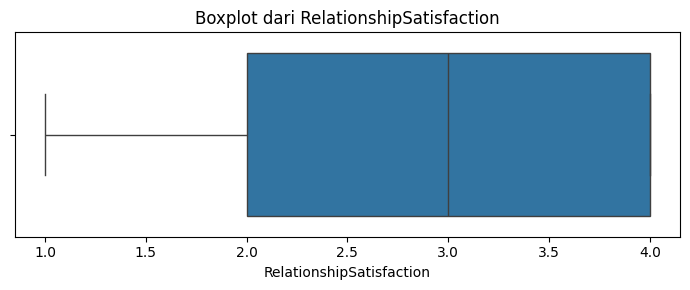

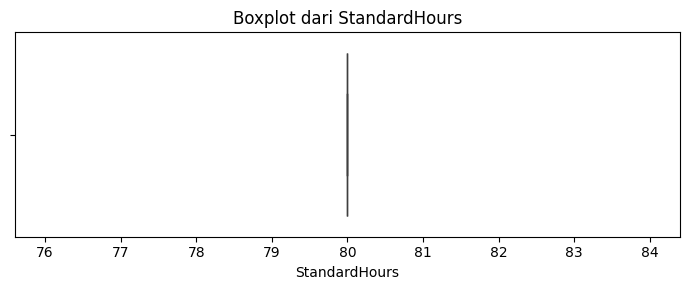

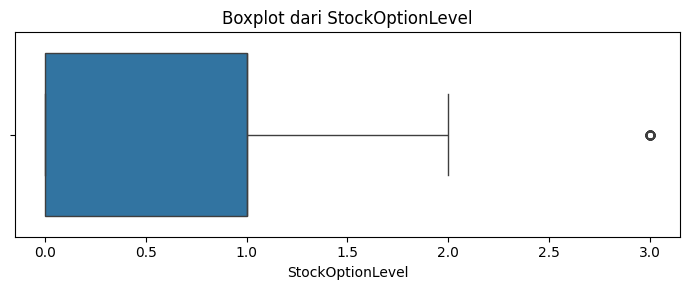

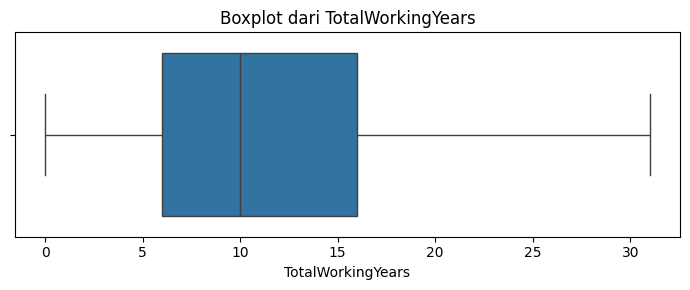

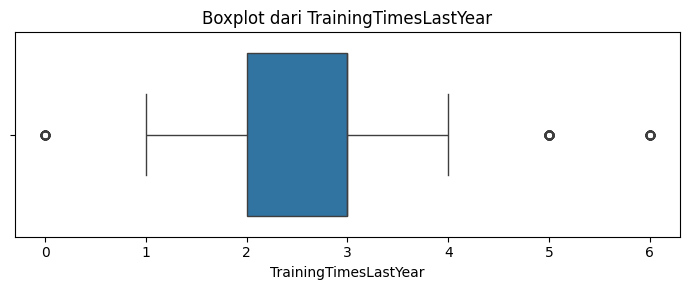

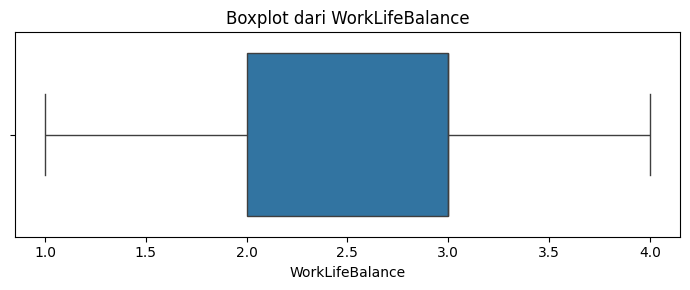

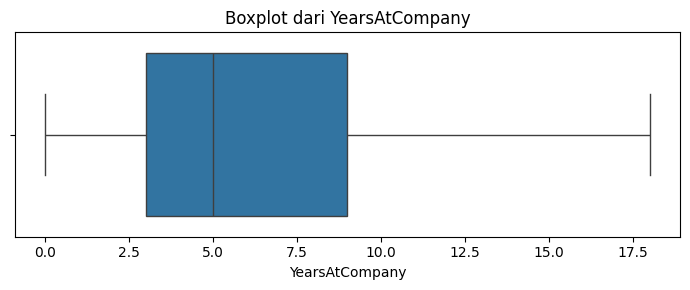

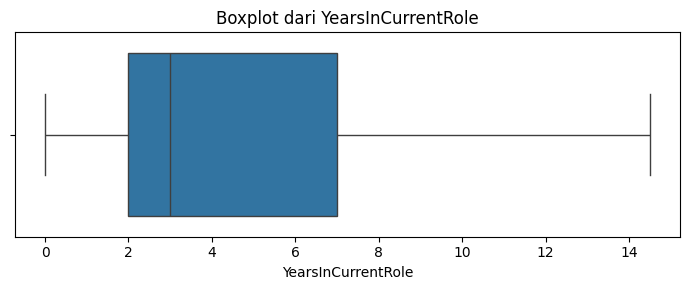

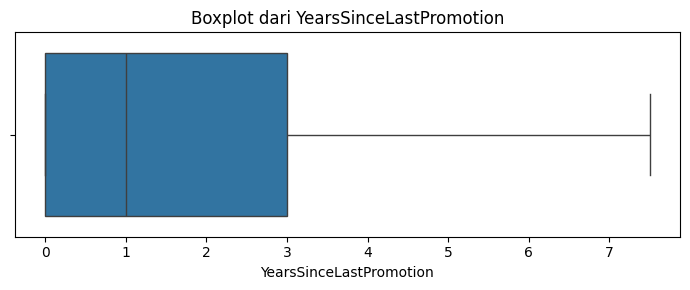

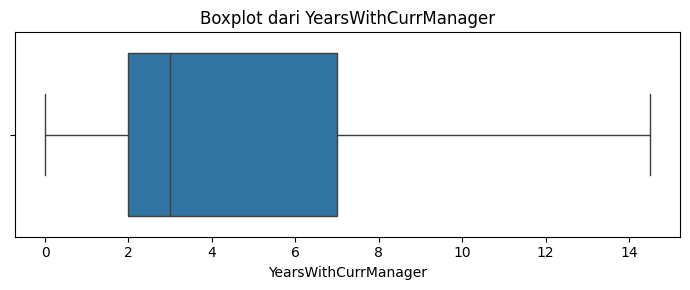

In [19]:
# Visualisasi boxplot untuk semua kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=df_clean, x=col)
    plt.title(f'Boxplot dari {col}')
    plt.tight_layout()
    plt.show()

Kita lanjut untuk encode kategorikal dan standarisasi numerikal

In [20]:
# Encoding Fitur Kategorikal
# Menggunakan LabelEncoder untuk fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Normalisasi/Standarisasi Data
# Menggunakan StandardScaler untuk standarisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[capping_features])

# Mengganti kolom yang telah distandarisasi
df_clean[capping_features] = scaled_features

# Menampilkan hasil akhir
df_clean.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,-1.719548,-0.005929,1.0,2,0.811829,1,0.251560,2,3,0.0,...,1,0.0,0,0.472576,2,1,-1.118063,-1.195556,-0.772831,-1.165271
2,-1.717207,1.482487,1.0,2,1.257596,1,-0.619433,4,1,0.0,...,3,0.0,3,0.859961,2,4,0.665518,-1.195556,0.030367,0.812272
3,-1.714866,0.525648,0.0,1,-0.623443,2,2.117973,3,2,0.0,...,4,0.0,1,1.505603,2,4,2.250923,-0.067316,0.833564,1.094778
6,-1.707845,0.313018,0.0,2,0.770191,2,-0.992715,2,3,0.0,...,3,0.0,3,-0.689580,2,2,-0.523536,-0.349376,-0.772831,-0.600259
7,-1.705504,1.907749,1.0,2,-0.207067,1,-0.868288,3,3,0.0,...,4,0.0,1,1.634732,2,3,-0.325360,-0.631436,-0.371232,-0.035247


Kita lanjut split train and test, pisahkan juga kolom attrition

In [21]:
# Pisahkan fitur dan target
X = df_clean.drop(columns=['Attrition'])
y = df_clean['Attrition']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan ukuran data latih dan data uji
print(f"Ukuran data latih: {X_train.shape}, {y_train.shape}")
print(f"Ukuran data uji: {X_test.shape}, {y_test.shape}")

Ukuran data latih: (846, 34), (846,)
Ukuran data uji: (212, 34), (212,)


Sepertinya ada sedikit kegagalan encode, jadinya dilakukan encode ulang

In [22]:
# Gabungkan X_train dan X_test untuk encoding konsisten
X_combined = pd.concat([X_train, X_test], axis=0)

# One-hot encoding
X_encoded = pd.get_dummies(X_combined, drop_first=True)

# Pisahkan kembali
X_train_encoded = X_encoded.iloc[:len(X_train), :]
X_test_encoded = X_encoded.iloc[len(X_train):, :]


## Modeling

Di sini saya melatih dengan 2 model yaitu random forest dan gradient boosting

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Pelatihan model Random Forest
rf_model.fit(X_train_encoded, y_train)

# Pelatihan model Gradient Boosting
gb_model.fit(X_train_encoded, y_train)


GradientBoostingClassifier(random_state=42)

## Evaluation

In [24]:
# Evaluasi akurasi pada data latih
rf_train_accuracy = rf_model.score(X_train_encoded, y_train)
gb_train_accuracy = gb_model.score(X_train_encoded, y_train)

print(f"Akurasi Random Forest pada data train: {rf_train_accuracy:.2f}")
print(f"Akurasi Gradient Boosting pada data train: {gb_train_accuracy:.2f}")

# Evaluasi akurasi pada data uji
rf_test_accuracy = rf_model.score(X_test_encoded, y_test)
gb_test_accuracy = gb_model.score(X_test_encoded, y_test)

print(f"Akurasi Random Forest pada data test: {rf_test_accuracy:.2f}")
print(f"Akurasi Gradient Boosting pada data test: {gb_test_accuracy:.2f}")

Akurasi Random Forest pada data train: 1.00
Akurasi Gradient Boosting pada data train: 0.97
Akurasi Random Forest pada data test: 0.84
Akurasi Gradient Boosting pada data test: 0.85


Terlihat model memiliki akurasi yang baik pada kedua algoritma, namun saya lebih suka yang gradient boosting karena lebih tinggi pada testing dan memiliki selisih yang lebih kecil dengan akurasi train

In [26]:
# Salin df_clean agar tidak mengubah data asli
df_to_save = df_clean.copy()

# Inverse transform fitur numerik yang distandarisasi
df_to_save[capping_features] = scaler.inverse_transform(df_to_save[capping_features])

# Inverse transform fitur kategorikal yang di-label encode
for col in categorical_cols:
    le = label_encoders[col]
    df_to_save[col] = le.inverse_transform(df_to_save[col])

# Simpan ke CSV
df_to_save.to_csv('employee_data_cleaned.csv', index=False)